# Ralentissement

## Collision élastique

1. Résoudre l'exercice `Diffusion_Elastique_ex.pdf`
1.1 Ecrire la vitesse du centre de masse. Exprimer celle-ci en fonction du ratio de masse atomique $A = M/m$.  
1.2 Exprimer la vitesse du neutron et du noyau dans le centre de masse que nous noterons respectivement $w$ et $W$.  
1.3 Exprimez la relation entre l’énergie cinétique avant le choc dans le référentiel du laboratoire ($E_L$) et le référentiel du centre de masse ($E_{B}$).  
1.4 Dans le centre de masse calculez la quantité de mouvement totale.  
1.5 Dans le centre de masse, en appliquant les lois de conservations de la quantité de mouvement totale et de l’énergie cinétique, montrez que l’amplitude des vecteurs vitesses ne changent pas.  
1.6 Exprimez la vitesse après choc du neutron dans le laboratoire
2. Implémenter une fonction qui renvoit l'énergie de sortie et le cosinus de diffusion dans le laboratoire en fonction de l'énergie d'entrée, de l'angle de diffusion dans le centre de masse $\cos(\theta)$ et de $A$ le ratio de masse atomique. 
3. En supposant, la distribution $cos(\theta)$ uniforme entre [0, 1], tracez $E_{out} = f(\cos(\theta))$ pour $E_{in} = 1$ fixé et $\cos(\psi) = f(\cos(\theta))$ pour différentes valeurs de $A = [1,2,10,50,100,200,235]$

Commentez.

On commence par déterminer la vitesse du centre de masse B : 
$$ \vec{v_B} = \frac{m \vec{v_{in}}+M \vec{V_{in}}}{m+M} = \frac{1}{1+A} \vec{v_{in}} $$

car $ \vec{V_{in}}= \vec{0} $

On peut exprimer les vitesses du neutrons $\vec{w_{in}} $ et du noyau $\vec{W_{in}}$ dans le centre de masse
$$\vec{w_{in}} = \vec{v_{in}} - \vec{v_{B}} = \vec{v_{in}} (1 - \frac{1}{1+A}) = \frac {A}{A+1} \vec{v_{in}} $$
$$\vec{W_{in}} = \vec{V_{in}} - \vec{v_{B}} = \vec{v_{in}} (\frac{A}{1+A} - 1 ) = - \frac {1}{A+1} \vec{v_{in}}$$

Dans le référentiel du laboratoire, l'énergie cinétique avant le choc vaut : 

$$ E_c = E_{c1} + E_{c2} = \frac{1}{2} m v_{in}^2 $$

car $ E_{c2}=0 $ car $ \vec{V_{in}}= \vec{0} $

Dans le référentiel du centre de masse, l'énergie cinétique vaut: 

$$ E_B = E_{c1}' + E_{c2}' = \frac{1}{2} m (\frac{A}{1+A})^2 v_{in}^2 + \frac{1}{2} M (\frac{1}{1+A})^2 v_{in}^2  = \frac {A}{A+1} E_c$$

On exprime la quantité de mouvement : 
$$ \vec{p_t} = m \vec{w_{in}} + M \vec{W_{in}} = \vec{0}$$

**Q5 :**  
Conservation quantité de mouvement : 

$$\frac{d\vec{p}}{dt} = \vec{0} \Rightarrow \vec{p} = \vec{cste}

\Rightarrow m \vec{w_{out}} + M \vec{W_{out}} = \vec{0} = m \vec{w_{in}} + M \vec{W_{in}}$$ 

Conservation de l'énergie cinétique : 

$$\frac{1}{2} m  w_{in}^2 + \frac{1}{2} M W_{in}^2 = \frac{1}{2} m  w_{out}^2 + \frac{1}{2} M W_{out}^2$$

Ce qui permet d'obtenir après manipulation :  

$$
\begin{cases}
w_{out}^2 = w_{in}^2 \\
W_{out}^2 = W_{in}^2
\end{cases}
$$

**Q6 :**  
On considère $\theta$ connu et l'on cherche $\vec{v_{out}}$. Pour cela il faut une amplitude et une direction  
D'après la question 2 :

$$\vec{v_{out}} = \vec{w_{out}} + \vec{v_{B}} \Rightarrow v_{out}^2 = w_{out}^2 + v_{B}^2 + 2 \vec{w_{out}} \cdot 
\vec{v_{B}}$$ 


$$v_{out}^2 = v_{in}^2 [(\frac{A}{A+1})^2 + \frac{2A}{(A+1)^2} \cos(\theta) + \frac{1}{(1+A)^2}] = v_{in}^2[\frac{A^2 + 2A \cos(\theta) + 1}{(A+1)^2}]$$

On calcule aussi le fraction d'éerngie cinétique en sortie par rapport à celle en entrée :  

$$ \frac{E_{c_{out}}}{E_{c_{in}}} = \frac{1 + 2A \cos(\theta) + A^2}{(A+1)^2}



$$\frac{E_{out}}{E_{in}}=\frac{A^2+2A\mathrm{cos}(\theta)+1}{(A+1)^2}$$

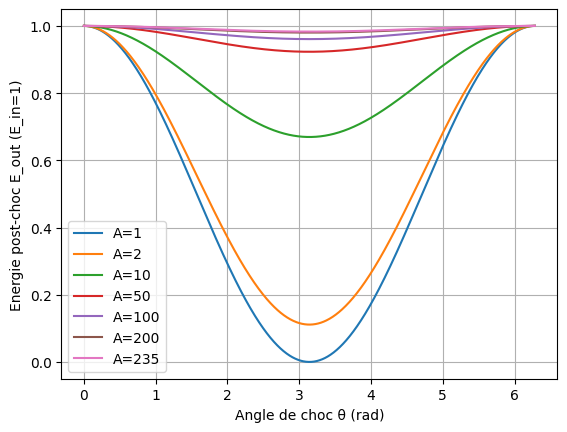

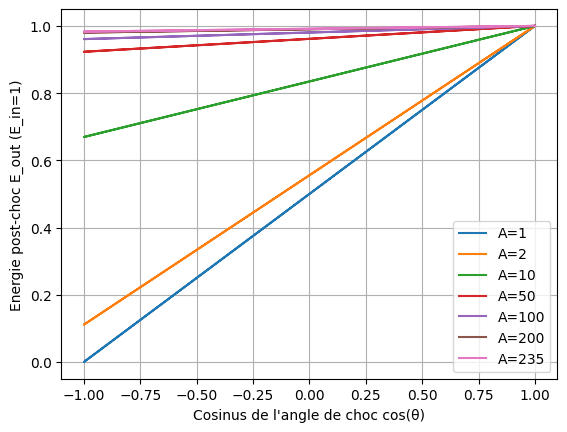

/tmp/ipykernel_162813/2826665364.py:20: RuntimeWarning: invalid value encountered in divide
  return (1+A*cosTheta)/np.sqrt(A**2+2*A*cosTheta+1)


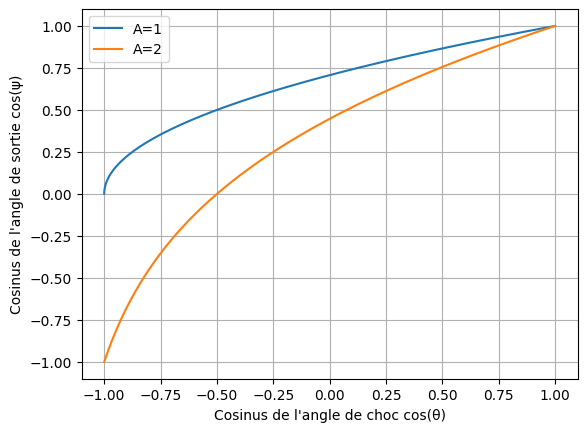

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def f(theta,Ein=1,A=1):
    """Calcul de l'énergie post-choc en fonction de l'angle de choc et du rapport de masse A

    Args:
        theta (int): _angle de choc_
        Ein (int, optional): Energie pré-choc. Defaults to 1.
        A (int, optional): Rapport de masse. Defaults to 1.

    Returns:
        int: Energie post-choc
    """
    Eout=Ein*(A**2+2*np.cos(theta)*A+1)/(1+A)**2
    return Eout

def cosPsi(cosTheta,A=1):
    return (1+A*cosTheta)/np.sqrt(A**2+2*A*cosTheta+1)


LA=[1,2,10,50,100,200,235]
Tx=np.linspace(0,2*np.pi,1000)

for A in LA:
    Ty=f(Tx,A=A)
    plt.plot(Tx, Ty, label='A={}'.format(A))
plt.legend()
plt.grid()
plt.xlabel('Angle de choc θ (rad)')
plt.ylabel('Energie post-choc E_out (E_in=1)')
plt.show()

for A in LA:
    plt.plot(np.cos(Tx), f(Tx,A=A), label='A={}'.format(A))
plt.legend()
plt.grid()
plt.xlabel('Cosinus de l\'angle de choc cos(θ)')
plt.ylabel('Energie post-choc E_out (E_in=1)')
plt.show()


Tx=np.linspace(0,np.pi,1000)
plt.plot(np.cos(Tx), cosPsi(np.cos(Tx)), label='A=1')
plt.plot(np.cos(Tx), cosPsi(np.cos(Tx),A=2), label='A=2')
plt.legend()
plt.grid()
plt.xlabel('Cosinus de l\'angle de choc cos(θ)')
plt.ylabel('Cosinus de l\'angle de sortie cos(ψ)')
plt.show()

Minimale en $\theta=\pi$ et maximale en $\theta=0$. On remarque que plus A est grand (ie, plus il y a d'écart de masse entre le noyau et la masse d'un neutron), moins l'énergie de sortie diminue donc on a avantage à prendre des noyaux lourds.

## Une approche Monte Carlo du ralentissement

Nous ne considérerons que la variable énergétique.  
En partant d'une source située en $E = 1 MeV$,  
modélisez via la méthode de Monte Carlo, le ralentissement dans un milieu ressemblant à l'hydrogène (collision élastique avec $A=1$) sans absorbant.   

Considérez que $\Sigma_s(E) = 1.0$ et $\Sigma_a(E) = 0.0$.  
Utilisez une source de 1E4 neutrons.  
Tracer le spectre en fonction de l'énergie et comparer à la solution analytique. 


Faites varier le nombre de neutrons, faites varier $A$ (par exemple $A=16$ correspond à l'O16). 

Reprenez avec une section d'absorption non nulle.  
Tracer le spectre en fonction de l'énergie et comparer à la solution analytique. 


0.7785467128027681
Nombre moyen de collisions par neutron: 215.2896


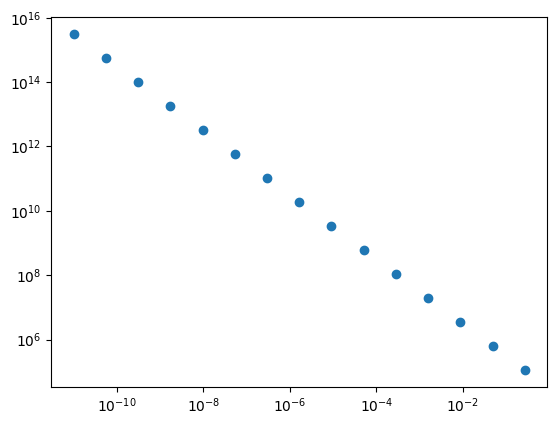

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, field 

@dataclass
class NuclearData:
    elastic_xs : float = 1.0
    absorption_xs : float = 0.0 # Sigma_t
    total_xs : float = field(init=False)
    atomic_weight_ratio : float = 1.0 # A
    def __post_init__(self):
        self.total_xs = self.elastic_xs + self.absorption_xs

    def get_total_xs(self, energy):
        return self.total_xs

E_lower_limit = 1e-11
rng = np.random.default_rng(0)
N_neutrons = 10000
E_source = 1.5

A=16
nb_intervalle=16
# intervalles=np.arange(0,E_source+taille_intervalle,taille_intervalle)
intervalles=np.logspace(np.log10(E_lower_limit),np.log10(E_source),nb_intervalle) # intervalles en logarithme
score_intervalle=np.zeros(len(intervalles) - 1)


alpha=((A-1)/(A+1))**2
print(alpha)
n=0
for i in range(N_neutrons):
    energie=E_source
    while energie>E_lower_limit:
        n+=1
        energie=rng.uniform(alpha*energie,energie)
        index_intervalle = np.searchsorted(intervalles, energie) - 1
        if 0 <= index_intervalle < len(score_intervalle):
            score_intervalle[index_intervalle] += 1

print('Nombre moyen de collisions par neutron:',n/N_neutrons)
score_intervalle /= np.diff(intervalles)

plt.loglog(intervalles[:-1],score_intervalle,'o')
plt.show()


        



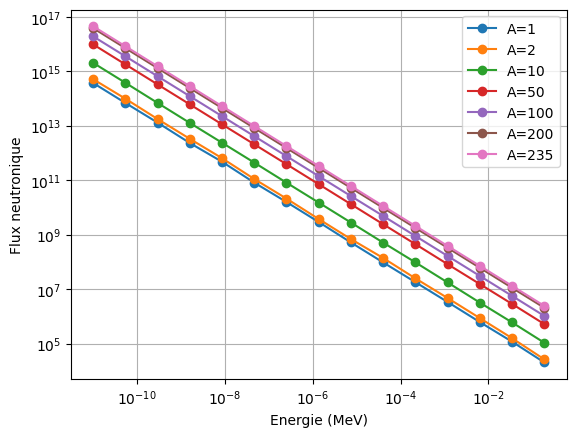

In [14]:
import multiprocessing
from multiprocessing import Pool
import numpy as np
import matplotlib.pyplot as plt
processes=multiprocessing.cpu_count()

def evolution_neutron(args):
    E_source, E_lower_limit, alpha, intervalles = args
    energie=E_source
    score_local = np.zeros(len(intervalles) - 1)
    while energie>E_lower_limit:
        energie=rng.uniform(alpha*energie,energie)
        index_intervalle = np.searchsorted(intervalles, energie) - 1
        if 0 <= index_intervalle < len(score_local):
            score_local[index_intervalle] += 1
    return(score_local)


E_lower_limit = 1e-11
rng = np.random.default_rng(0)
N_neutrons = 10000
E_source = 1.0

nb_intervalle=16
intervalles=np.logspace(np.log10(E_lower_limit),np.log10(E_source),nb_intervalle) # intervalles en logarithme

LA=[1,2,10,50,100,200,235]

for A in LA:
    alpha=((A-1)/(A+1))**2

    with Pool(processes) as pool:
        results = pool.map(evolution_neutron,[(E_source, E_lower_limit, alpha, intervalles)] * N_neutrons)

    score_total = np.sum(results, axis=0)
    score_total /= np.diff(intervalles)


    plt.loglog(intervalles[:-1],score_total,'o-',label='A={}'.format(A))
    # plt.semilogx(intervalles[:-1],score_total,'o-',label='A={}'.format(A))
plt.legend()
plt.grid()
plt.xlabel('Energie (MeV)')
plt.ylabel('Flux neutronique')
plt.show()


# Section d'absorption non nulle

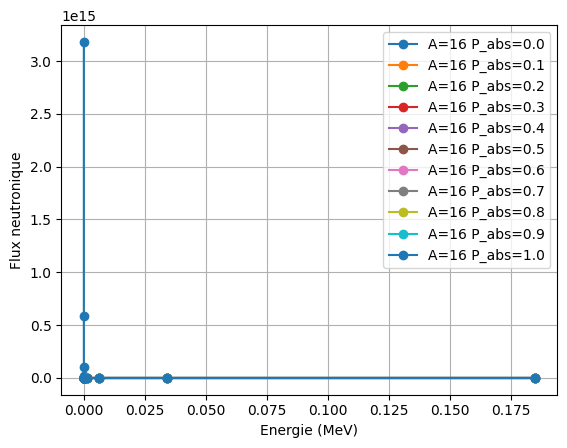

In [21]:
import multiprocessing
from multiprocessing import Pool
import numpy as np
import matplotlib.pyplot as plt
processes=multiprocessing.cpu_count()


def evolution_neutron(args):
    E_source, E_lower_limit, alpha, intervalles, Proba_absorption = args
    energie=E_source
    score_local = np.zeros(len(intervalles) - 1)

    while energie>E_lower_limit:
        if rng.uniform(0,1)<Proba_absorption:
            break
        energie=rng.uniform(alpha*energie,energie)
        index_intervalle = np.searchsorted(intervalles, energie) - 1
        if 0 <= index_intervalle < len(score_local):
            score_local[index_intervalle] += 1
    return(score_local)


E_lower_limit = 1e-11
rng = np.random.default_rng(0)
N_neutrons = 10000
E_source = 1.0
Proba_absorption=0.5

nb_intervalle=16
intervalles=np.logspace(np.log10(E_lower_limit),np.log10(E_source),nb_intervalle) # intervalles en logarithme

LA=[16]
L_absorption=list(np.arange(0,1.1,0.1))

for Proba_absorption in L_absorption:
    for A in LA:
        alpha=((A-1)/(A+1))**2

        with Pool(processes) as pool:
            results = pool.map(evolution_neutron,[(E_source, E_lower_limit, alpha, intervalles, Proba_absorption)] * N_neutrons)

        score_total = np.sum(results, axis=0)
        score_total /= np.diff(intervalles)


        # plt.loglog(intervalles[:-1],score_total,'o-',label='A={} P_abs={:.1f}'.format(A, Proba_absorption))
        plt.plot(intervalles[:-1],score_total,'o-',label='A={} P_abs={:.1f}'.format(A, Proba_absorption))
        # plt.semilogx(intervalles[:-1],score_total,'o-',label='A={}'.format(A))
plt.legend()
plt.grid()
plt.xlabel('Energie (MeV)')
plt.ylabel('Flux neutronique')
plt.show()